In [ ]:
'''
This notebook is to demonstrate-
a. How to mix Noise into Audio Signal
b. What is the the outcome after mixing with audio signal .. how to visulaize mixed signal

'''

In [11]:
import librosa
print("librosa", librosa.__version__)


%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import librosa
import numpy as np
import scipy
import math
from IPython.display import Audio


librosa 0.7.2


In [10]:

def fft_plot(audio, sampling_rate):
    n=len(audio)
    T=1/sampling_rate    
    yf=scipy.fft(audio)        
    xf=np.linspace(0.0, 1.0/(2.0*T), int(n/2))
    fig,ax = plt.subplots()
    ax.plot(xf,2.0/n*np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency -->")
    plt.ylabel("Magnitude")
    return plt.show()

In [12]:

def get_noise_from_sound(signal,noise,SNR):
    try:
        RMS_s=math.sqrt(np.mean(signal**2))
        #required RMS of noise
        RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/20)))

        #current RMS of noise
        RMS_n_current=math.sqrt(np.mean(noise**2))
        noise=noise*(RMS_n/RMS_n_current)
    
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None
    
    return noise

D:\Users\618757\Anaconda3\envs\tensorFlowEnv\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  after removing the cwd from sys.path.


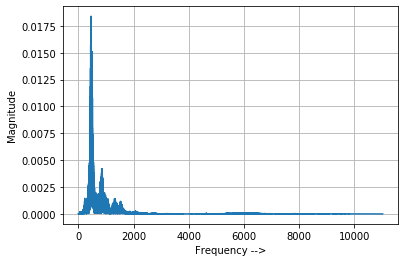

D:\Users\618757\Anaconda3\envs\tensorFlowEnv\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  after removing the cwd from sys.path.


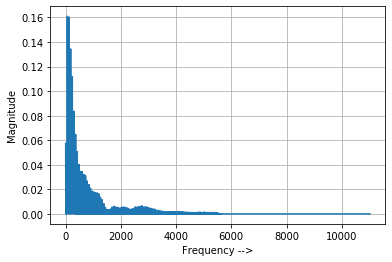

D:\Users\618757\Anaconda3\envs\tensorFlowEnv\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  after removing the cwd from sys.path.


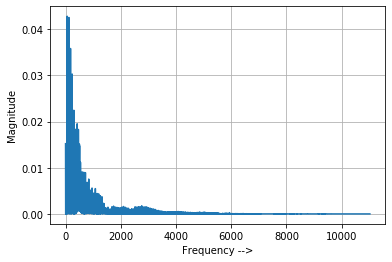

D:\Users\618757\Anaconda3\envs\tensorFlowEnv\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  after removing the cwd from sys.path.


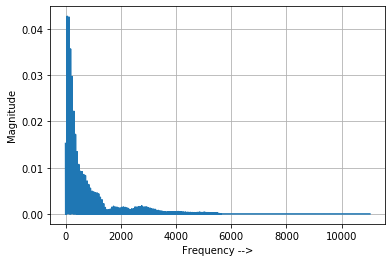

In [13]:
audio_file = '101415-3-0-2-gun-shot.wav'
noise_audio_file = 'hi-tensionpower.wav'

signal,sr = librosa.load(audio_file, sr=22050, res_type='kaiser_fast')
noise_sample, sr1 = librosa.load(noise_audio_file, sr=22050,res_type='kaiser_fast')

if(len(noise_sample) > len(signal)):
    noise_sample=noise_sample[0:len(signal)]

if(len(noise_sample) < len(signal)):
    signal=signal[0:len(noise_sample)]

noise3=get_noise_from_sound(signal,noise_sample,SNR=8)
signal_noise3=signal+noise3

librosa.output.write_wav('signal_noise11.wav', signal_noise3, sr1)

fft_plot(signal, sr)
fft_plot(noise_sample, sr1)
fft_plot(signal_noise3, sr)
fft_plot(noise3, sr)